<hr style="height: 4px; color: #839D2D; width: 100%; ">

# <font color='#61210B'>Formation OpenClassRooms   -   Parcours DATA ANALYST</font>

<hr style="height: 2px; color: #839D2D; width: 100%; ">

## <font color='#38610B'>Projet III  - Réalisez une etude de santé publique</font>
### Réaliser une étude de grande ampleur sur le thème de la sous-nutrition dans le monde.
Les données sont issues du site de la FAO (<http://www.fao.org/faostat/fr/#data>).  
Voici les critères de téléchargement ainsi que les DataFrames pandas contenant ces tables/fichiers :  
* <font color='#8A0808'>DataFrame <strong>ani</strong></font> : Bilan Alimentaire Produits Animaliers (**Pays** = tous, **Eléments** = tous, **Année** = 2013, **Groupe Produits** = Produits Animaux(liste) )
* <font color='#8A0808'>DataFrame <strong>veg</strong></font> : Bilan Alimentaire Produits Vegetaux (**Pays** = tous, **Eléments** = tous, **Année** = 2013, **Groupe Produits** = Produits Végétaux(liste) )
* <font color='#8A0808'>DataFrame <strong>pop</strong></font> : Bilan Alimentaire Produits Vegetaux (**Pays** = tous, **Eléments** = population totale, **Année** = 2013, **Produits** = Population )
* <font color='#8A0808'>DataFrame <strong>ssn</strong></font> : Sous-Nutrition en Nb.personnes/Pays (**Pays** = tous, **Eléments** = population totale, **Année** = 2013-2016, **Produits** = Population )
* <font color='#8A0808'>DataFrame <strong>cer</strong></font> : Bilan Produits Type "cérèales" (**Pays** = Monde, **Eléments** = tous, **Année** = 2013, **Groupe Produits** = Cérèales-Excl bière>(liste) )

**<font color='#38610B'>- Date : 18 Dec 2018</font>**  
Auteur : Frédéric Boissy
<hr style="height: 4px; color: #839D2D; width: 100%; ">


#####   <font color='#013ADF'>ENVIRONNEMENT DE TRAVAIL :</font> Définition - Initialisation

In [1]:
# -*- coding: utf8 -*-
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format   # Nombres avec sepa milliers "," et 2décimales après "."
pd.options.mode.use_inf_as_na = True
import seaborn as sns
from IPython.display import display, Markdown, HTML  # pour gérer un affichage plus joli que la fonction "print"

import time   # Librairie temps pour calculs durée par exemple
trt_start_time = time.time()

In [2]:
# Pour executer des requetes SQL de verification sur des DF
from pandasql import sqldf
execsql = lambda q: sqldf(q, globals())   
# req1 = ''' Select zone1, zone2 From DataFrame Where zone3=xx and zone4='xx' limit 3;'''
# df1 = execsql(req1)
# df1

#####   <font color='#013ADF'>REPERTOIRE DE TRAVAIL :</font> (du Projet)
Par defaut on utilisera celui dans lequel se trouve ce fichier jupyter - Puis on spécifie le dossier DATA

In [3]:
%cd DATA

D:\DATA_ANALYST\WORK\#GITHUB\PJ3\DATA


#####   <font color='#013ADF'>CHARGEMENT DES TABLES de la FAO :</font> dans des Dataframes "Pandas"

In [4]:
ani = pd.read_csv("PJ3-Bilan_Alim_Animaux.zip")
veg = pd.read_csv("PJ3-Bilan_Alim_Vegetaux.zip")
pop = pd.read_csv("PJ3-Population_par_Pays.csv")
ssn = pd.read_csv("PJ3-Sous_Alimentation_par_Pays(2013-2016).csv")
cer = pd.read_csv("PJ3-Produits_Cerealiers_par_Pays.csv")

#####   <font color='#013ADF'>MISE EN FORME DES DATAFRAMES POUR LE PROJET - </font>  Colonnes : nouveaux noms, suppression colonnes inutiles

* <font color='#0000FF'><u><strong>pop</strong>  - Population 2013, par Pays (en milliers de personnes)</u>

In [5]:
pop.columns = ["xx1", "xx2", "CPAYS", "PAYS", "xx3", "xx4", "xx5", "xx6", "xx7", 
               "ANNEE", "UNIT", "VALP", "xx8", "xx9"]
pop.drop(columns=['xx1', 'xx2', 'xx3', 'xx4', 'xx5', 'xx6', 'xx7', 'xx8', 'xx9'], inplace=True)
pop.head()

,CPAYS,PAYS,ANNEE,UNIT,VALP
0,2,Afghanistan,2013,1000 personnes,30552
1,202,Afrique du Sud,2013,1000 personnes,52776
2,3,Albanie,2013,1000 personnes,3173
3,4,Algérie,2013,1000 personnes,39208
4,79,Allemagne,2013,1000 personnes,82727


* <font color='#0000FF'><u><strong>ani</strong> - Bilan Alimentaire 2013 - Catégorie "Animaux"</u>

In [6]:
ani.columns = ["xx", "xx", "CPAYS", "PAYS", "CELEM", "ELEMENT", "CPROD", "PROD", "xx", 
               "ANNEE", "UNIT", "VAL", "xx", "xx"]
ani.drop(columns=['xx'], inplace=True)
ani.head(2)

,CPAYS,PAYS,CELEM,ELEMENT,CPROD,PROD,ANNEE,UNIT,VAL
0,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,Milliers de tonnes,134.00
1,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,Milliers de tonnes,6.00


* <font color='#0000FF'><u><strong>veg</strong> - Bilan Alimentaire 2013 - Catégorie "Végétaux"</u>

In [7]:
veg.columns = ["xx", "xx", "CPAYS", "PAYS", "CELEM", "ELEMENT", "CPROD", "PROD", "xx", 
               "ANNEE", "UNIT", "VAL", "xx", "xx"]
veg.drop(columns=['xx'], inplace=True)
veg.head(2)

,CPAYS,PAYS,CELEM,ELEMENT,CPROD,PROD,ANNEE,UNIT,VAL
0,2,Afghanistan,5511,Production,2511,Blé,2013,Milliers de tonnes,"5,169.00"
1,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2013,Milliers de tonnes,"1,173.00"


* <font color='#0000FF'><u><strong>ssn</strong> - Data Sécurité Alimentaire 2013/2016</u></font> (Nb de personnes en sous-nutrition par pays)

In [8]:
ssn.columns = ["xx", "xx", "CZONE", "ZONE", "CELEM", "ELEMENT", "CPROD", "PROD", "xx", 
               "ANNEE", "UNIT", "VAL", "xx", "xx"]
ssn.drop(columns=['xx'], inplace=True)
ssn.head(2)

,CZONE,ZONE,CELEM,ELEMENT,CPROD,PROD,ANNEE,UNIT,VAL
0,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,2012-2014,millions,8.10
1,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,2015-2017,millions,10.50


* <font color='#0000FF'><u><strong>cer</strong> - Bilan Alimentaire 2013 - Spécifique "Cérèales"</u>

In [9]:
cer.columns = ["xx", "xx", "CPAYS", "PAYS", "CELEM", "ELEMENT", "CPROD", "PROD", "xx", 
               "ANNEE", "UNIT", "VAL", "xx", "xx"]
cer.drop(columns=['xx'], inplace=True)
cer.head(2)

,CPAYS,PAYS,CELEM,ELEMENT,CPROD,PROD,ANNEE,UNIT,VAL
0,2,Afghanistan,5511,Production,2511,Blé,2013,Milliers de tonnes,"5,169.00"
1,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2013,Milliers de tonnes,"1,173.00"


#####   <font color='#013ADF'>DEFINITION DE VARIABLES DE TRAVAIL :</font> (du Projet)

In [10]:
varcp_chine = 351   # Variable code pays de la chine

<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>QUESTION 1</u></font> : Population Mondiale - Année 2013
- Calcul du nombre total d’humains sur la planète.

In [11]:
parm1 = "La Population mondiale pour l'année 2013 est :"
parm2 = '{:15,.0f}'.format(pop['VALP'].sum()*1000)
Markdown('<strong>{}</strong><br/>{}'.format(parm1, parm2))

<strong>La Population mondiale pour l'année 2013 est :</strong><br/>  8,413,993,000

Le résultat semble un peu élevé. En effet, après étude, on s'aperçoit qu'il y a plusieurs lignes pour la chine.
Il faudra donc éliminer soit la ligne "Total" avec code pays = 351, soit les 4 lignes details dont les codes pays sont (41,96,128,214)

In [12]:
pop[pop['PAYS'].str.contains("Chin")]                # Methode avec un "like SQL" sur chaine de caractère
# pop[pop['CPAYS'].isin([41, 96, 128, 214, 351])]    # Methode avec test du CPAYS

,CPAYS,PAYS,ANNEE,UNIT,VALP
33,96,Chine - RAS de Hong-Kong,2013,1000 personnes,7204
34,128,Chine - RAS de Macao,2013,1000 personnes,566
35,41,"Chine, continentale",2013,1000 personnes,1385567
36,214,"Chine, Taiwan Province de",2013,1000 personnes,23330
174,351,Chine,2013,1000 personnes,1416667


Suppression de la ligne pour le code pays 351.  Maj de la quantité par x1000. Suppression de la colonne unité

In [13]:
pop.drop(columns=['UNIT'], inplace=True)
pop.drop(pop[pop.CPAYS == varcp_chine].index, inplace=True)
pop['VALP'] *= 1000

In [14]:
pop_monde = pop['VALP'].sum()  # On stocke cette valeur dans une variable pour réutilisation future
Markdown('<strong>{}</strong><br/>{}'.format(parm1, '{:15,.0f}'.format(pop_monde)))

<strong>La Population mondiale pour l'année 2013 est :</strong><br/>  6,997,326,000

<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>QUESTION 2</u></font> : Identifiez des redondances dans les Datas FAO
    Illustration avec l'exemple du blé en France (a partir du Dataframe "veg")

In [15]:
veg[(veg['CPAYS'] == 68) & (veg['CPROD'] == 2511)].head(20)

,CPAYS,PAYS,CELEM,ELEMENT,CPROD,PROD,ANNEE,UNIT,VAL
36006,68,France,5511,Production,2511,Blé,2013,Milliers de tonnes,"38,614.00"
36007,68,France,5611,Importations - Quantité,2511,Blé,2013,Milliers de tonnes,"2,055.00"
36008,68,France,5072,Variation de stock,2511,Blé,2013,Milliers de tonnes,"1,131.00"
36009,68,France,5911,Exportations - Quantité,2511,Blé,2013,Milliers de tonnes,"21,502.00"
36010,68,France,5301,Disponibilité intérieure,2511,Blé,2013,Milliers de tonnes,"20,298.00"
36011,68,France,5521,Aliments pour animaux,2511,Blé,2013,Milliers de tonnes,"7,822.00"
36012,68,France,5527,Semences,2511,Blé,2013,Milliers de tonnes,748.00
36013,68,France,5123,Pertes,2511,Blé,2013,Milliers de tonnes,358.00
36014,68,France,5131,Traitement,2511,Blé,2013,Milliers de tonnes,"1,575.00"
36015,68,France,5154,Autres Utilisations,2511,Blé,2013,Milliers de tonnes,"2,824.00"


Effectivement, il y a des données redondantes. On peut définir par exemple, les formules suivantes :

* [Production] + [Importations Quantite] + [Variation de Stock] **=** <font color='#21610B'>[Disponibilite interieure]</font> + [Exportations Quantite] 

* <font color='#21610B'>[Disponibilite interieure]</font> **=** [Aliments pour animaux] + [Semences] + [Pertes] + [Traitement] + [Autres Utilisations] + [Nourriture]


<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>QUESTION 3</u></font> : Calculs de Disponibilité Alimentaire  (par Pays/Produit)
    
    Exprimée en kcal, puis en Kg de protéines

#####   <font color='#61210B'>Regroupement des Dataframes "ani" et "veg"</font>  - Ajout de la population (issu du DF pop) et de l"origine" dans un nouveau DF généré : "gen"

In [16]:
ani["ORIG"] = "animal"
veg["ORIG"] = "vegetal"
temp = ani.append(veg)
temp.head()

,CPAYS,PAYS,CELEM,ELEMENT,CPROD,PROD,ANNEE,UNIT,VAL,ORIG
0,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,Milliers de tonnes,134.00,animal
1,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,Milliers de tonnes,6.00,animal
2,2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2013,Milliers de tonnes,140.00,animal
3,2,Afghanistan,5142,Nourriture,2731,Viande de Bovins,2013,Milliers de tonnes,140.00,animal
4,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,kg,4.59,animal


#####   <font color='#61210B'>Affichage des valeurs uniques de la colonne ELEMENT</font>  => Noms des futures colonnes que va générer le "pivot" à l'instruction suivante
Attention au TRI par Code Element : Il déterminera l'ordre de nos futures colonnes car on gardera l'ordre de tri dans le pivot

In [17]:
req1 = '''Select Distinct CELEM, ELEMENT From temp 
Order by CELEM limit 20;'''
execsql(req1)

,CELEM,ELEMENT
0,645,Disponibilité alimentaire en quantité (kg/pers...
1,664,Disponibilité alimentaire (Kcal/personne/jour)
2,674,Disponibilité de protéines en quantité (g/pers...
3,684,Disponibilité de matière grasse en quantité (g...
4,5072,Variation de stock
5,5123,Pertes
6,5131,Traitement
7,5142,Nourriture
8,5154,Autres Utilisations
9,5301,Disponibilité intérieure


#####   <font color='#61210B'>Pivot sur le dataframeT</font>  => Les "valeurs" de la colonne élément "pivotent" , pouur devenir des colonnes uniques

In [18]:
data = temp.pivot_table(
    index=["CPAYS","PAYS","CPROD","PROD","ANNEE","ORIG"],
    columns = ["CELEM", "ELEMENT", "UNIT"], values=["VAL"], aggfunc=sum)
data.columns = ['QT_DISPALI_KG', 'QT_DISPALI_KCAL', 'QT_DISPROT', 'QT_DISPMG', 'QT_VARSTOCK', 'QT_PERTES',
                'QT_TRANSF', 'QT_NOURRIT', 'QT_AUTRES', 'QT_DISPINT', 'QT_PRODUCT', 'QT_ALIMANI', 
                'QT_SEMENCES', 'QT_IMPORT', 'QT_EXPORT']
data = data.reset_index()

#####   <font color='#61210B'>Jointure avec Df population pour ajout de la colonne VALP</font>  => Nouveau DF finalisé = gen

Particularité : la jointure avec le Dataframe pop permet d'exclure les données redondantes de la chine (code pays = 351)

In [19]:
gen = pd.merge(pop, data, how="left")
gen.head()

,CPAYS,PAYS,ANNEE,VALP,CPROD,PROD,ORIG,QT_DISPALI_KG,QT_DISPALI_KCAL,QT_DISPROT,...,QT_PERTES,QT_TRANSF,QT_NOURRIT,QT_AUTRES,QT_DISPINT,QT_PRODUCT,QT_ALIMANI,QT_SEMENCES,QT_IMPORT,QT_EXPORT
0,2,Afghanistan,2013,30552000,2511,Blé,vegetal,160.23,"1,369.00",36.91,...,775.00,nan,"4,895.00",nan,"5,992.00","5,169.00",nan,322.00,"1,173.00",nan
1,2,Afghanistan,2013,30552000,2513,Orge,vegetal,2.92,26.00,0.79,...,52.00,nan,89.00,nan,524.00,514.00,360.00,22.00,10.00,nan
2,2,Afghanistan,2013,30552000,2514,Maïs,vegetal,2.50,21.00,0.56,...,31.00,nan,76.00,nan,313.00,312.00,200.00,5.00,1.00,0.00
3,2,Afghanistan,2013,30552000,2517,Millet,vegetal,0.40,3.00,0.08,...,1.00,nan,12.00,nan,13.00,13.00,nan,0.00,nan,nan
4,2,Afghanistan,2013,30552000,2520,"Céréales, Autres",vegetal,0.00,0.00,0.00,...,nan,nan,0.00,nan,0.00,nan,nan,nan,0.00,nan


#####   <font color='#61210B'>Reséquencement Arbitraire des Colonnes du Dataframe

In [20]:
cols =  ['ANNEE', 'CPAYS', 'PAYS', 'VALP', 'CPROD', 'PROD', 'ORIG',
            'QT_DISPALI_KG', 'QT_DISPALI_KCAL', 'QT_DISPROT', 'QT_DISPMG',
            'QT_PRODUCT', 'QT_IMPORT', 'QT_VARSTOCK', 'QT_EXPORT', 'QT_DISPINT', 
            'QT_ALIMANI', 'QT_SEMENCES', 'QT_PERTES', 'QT_TRANSF', 'QT_AUTRES', 'QT_NOURRIT']
gen = gen[cols]
gen.head()

,ANNEE,CPAYS,PAYS,VALP,CPROD,PROD,ORIG,QT_DISPALI_KG,QT_DISPALI_KCAL,QT_DISPROT,...,QT_IMPORT,QT_VARSTOCK,QT_EXPORT,QT_DISPINT,QT_ALIMANI,QT_SEMENCES,QT_PERTES,QT_TRANSF,QT_AUTRES,QT_NOURRIT
0,2013,2,Afghanistan,30552000,2511,Blé,vegetal,160.23,"1,369.00",36.91,...,"1,173.00",-350.00,nan,"5,992.00",nan,322.00,775.00,nan,nan,"4,895.00"
1,2013,2,Afghanistan,30552000,2513,Orge,vegetal,2.92,26.00,0.79,...,10.00,0.00,nan,524.00,360.00,22.00,52.00,nan,nan,89.00
2,2013,2,Afghanistan,30552000,2514,Maïs,vegetal,2.50,21.00,0.56,...,1.00,nan,0.00,313.00,200.00,5.00,31.00,nan,nan,76.00
3,2013,2,Afghanistan,30552000,2517,Millet,vegetal,0.40,3.00,0.08,...,nan,nan,nan,13.00,nan,0.00,1.00,nan,nan,12.00
4,2013,2,Afghanistan,30552000,2520,"Céréales, Autres",vegetal,0.00,0.00,0.00,...,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00


#####   <font color='#61210B'> CALCULS de la disponibilité Alimentaire </font> par Pays/Produit
en Millions Kcal                     -->  Disp_Alim_Gen = (Dispo_Alimentaire) * (Population) *365 / 1'000'000  
en Mega Tonnes de proteines   -->  Disp_Alim_Pro = (Dispo_Alim_Proteine) * (Population) *365 * 1000 / 1'000'000'000

In [21]:
q3 = gen.copy()
q3sel = ['CPAYS', 'PAYS', 'VALP', 'CPROD', 'PROD', 'QT_DISPALI_KCAL', 'QT_DISPROT']
q3['D_Alim_Annu(Mkcal)']= q3['QT_DISPALI_KCAL']*q3['VALP']*365/1000000
q3['D_Alim_Pro_Annu(Mt)']= q3['QT_DISPROT']*q3['VALP']*365*1000/1000000000
q3[q3['CPAYS']==1][q3sel + ['D_Alim_Annu(Mkcal)', 'D_Alim_Pro_Annu(Mt)']].head()

,CPAYS,PAYS,VALP,CPROD,PROD,QT_DISPALI_KCAL,QT_DISPROT,D_Alim_Annu(Mkcal),D_Alim_Pro_Annu(Mt)
793,1,Arménie,2977000,2511,Blé,"1,024.00",30.52,"1,112,683.52","33,163.18"
794,1,Arménie,2977000,2513,Orge,0.00,0.00,0.00,0.00
795,1,Arménie,2977000,2514,Maïs,0.00,0.01,0.00,10.87
796,1,Arménie,2977000,2515,Seigle,1.00,0.02,"1,086.61",21.73
797,1,Arménie,2977000,2516,Avoine,2.00,0.09,"2,173.21",97.79


<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>QUESTION 4</u></font> : Calculs Ratio et Pourcentage :
* Calcul Ratio "Energie/Poids" exprimé (en kcal/kg) par Produit
* Calcul pourcentage de protéines de chaque produit par Pays / Produit  
  
Pour le ratio il faut exprimer la Qté de dispo alimentaire en kcal par an et la comparer à la Qté de dispo alimentaire kg.  
Faire un regroupement par PRODUIT :  
**Formule** : [RATIO(kcal/kg)] = [QT_DISPALI_KCAL] *365 / [QT_DISPALI_KG]

#####   <font color='#61210B'>Selection de Zones pour réaffichage, regroupement et calcul

In [22]:
q4sel = ['CPROD', 'PROD', 'QT_DISPALI_KCAL', 'QT_DISPALI_KG'] 

In [23]:
q4r = gen.groupby(['CPROD', 'PROD']).sum().reset_index()
q4r.head()

,CPROD,PROD,ANNEE,CPAYS,VALP,QT_DISPALI_KG,QT_DISPALI_KCAL,QT_DISPROT,QT_DISPMG,QT_PRODUCT,QT_IMPORT,QT_VARSTOCK,QT_EXPORT,QT_DISPINT,QT_ALIMANI,QT_SEMENCES,QT_PERTES,QT_TRANSF,QT_AUTRES,QT_NOURRIT
0,2511,Blé,350262,21825,6997326000,"12,339.51","96,132.00","2,809.21",548.76,"708,443.00","185,377.00","-15,948.00","198,380.00","679,498.00","129,668.00","34,283.00","27,530.00","7,877.00","22,424.00","457,824.00"
1,2513,Orge,348249,21649,6996193000,263.60,"1,814.00",52.28,7.35,"142,462.00","38,689.00",876.00,"41,585.00","140,439.00","92,658.00","8,804.00","4,628.00","26,910.00",654.00,"6,794.00"
2,2514,Maïs,350262,21825,6997326000,"3,690.37","30,903.00",771.12,271.50,"1,017,029.00","122,691.00","-55,136.00","128,787.00","955,799.00","546,116.00","6,837.00","40,701.00","47,648.00","189,386.00","125,184.00"
3,2515,Seigle,305976,19438,6684455000,263.36,"1,967.00",51.56,8.62,"16,711.00","2,251.00",-25.00,"2,372.00","16,567.00","8,099.00","1,262.00",562.00,"1,120.00",20.00,"5,502.00"
4,2516,Avoine,336171,20920,6843447000,151.43,880.00,35.70,15.29,"23,816.00","3,708.00",-577.00,"3,531.00","23,407.00","16,251.00","2,485.00",514.00,36.00,206.00,"3,903.00"


In [24]:
q4r['RATIO(kcal/kg)']= q4r['QT_DISPALI_KCAL']*365/q4r['QT_DISPALI_KG']
q4r[q4sel + ['RATIO(kcal/kg)']].head()

,CPROD,PROD,QT_DISPALI_KCAL,QT_DISPALI_KG,RATIO(kcal/kg)
0,2511,Blé,"96,132.00","12,339.51","2,843.56"
1,2513,Orge,"1,814.00",263.60,"2,511.80"
2,2514,Maïs,"30,903.00","3,690.37","3,056.49"
3,2515,Seigle,"1,967.00",263.36,"2,726.14"
4,2516,Avoine,880.00,151.43,"2,121.11"


#####   <font color='#21610B'> /// Contrôle résultat : Cas de l'Oeuf /// </font> La valeur Wikipedia etant : 147 kcal / 100gr
Ici je selectionne dans mon dataframe, les lignes dont le nom du produits est "oeufs" et je n'affiche que les colonnes de ma selection q4sel + le ratio

In [25]:
q4r[q4r['PROD'] == "Oeufs"][q4sel + ['RATIO(kcal/kg)']].head()

,CPROD,PROD,QT_DISPALI_KCAL,QT_DISPALI_KG,RATIO(kcal/kg)
81,2744,Oeufs,"4,665.00","1,231.95","1,382.14"


#####   <font color='#61210B'>Pour le pourcentage, on passe tout en grammes/an par exemple</font>
Faire un regroupement par PAYS / PRODUIT  
**Formule** : [Taux_Prot(%)] = ( [DISP_PROT] * 365 * 100 ) / ( [Poids(kg)]*1000 )

In [26]:
q4t = gen.groupby(['CPROD', 'PROD', 'CPAYS', 'PAYS']).sum().reset_index()
q4t['Taux_Prot(%)'] = (q4t['QT_DISPROT']*365*100)/(q4t['QT_DISPALI_KG']*1000)
q4t[['CPAYS', 'PAYS'] + q4sel + ['QT_DISPROT', 'Taux_Prot(%)']].head()

,CPAYS,PAYS,CPROD,PROD,QT_DISPALI_KCAL,QT_DISPALI_KG,QT_DISPROT,Taux_Prot(%)
0,1,Arménie,2511,Blé,"1,024.00",130.60,30.52,8.53
1,2,Afghanistan,2511,Blé,"1,369.00",160.23,36.91,8.41
2,3,Albanie,2511,Blé,"1,056.00",138.64,33.64,8.86
3,4,Algérie,2511,Blé,"1,424.00",185.42,42.97,8.46
4,7,Angola,2511,Blé,286.00,40.72,8.67,7.77


#####   <font color='#21610B'> /// Contrôle résultat : Cas de l'avoine /// </font> La valeur Wikipedia etant : 10.7gr protéines / 100gr
Ici je selectionne dans mon dataframe, les lignes dont le nom du produits est "Avoine" et je n'affiche que certaines colonnes avec ma selection q4sel

In [27]:
q4t[q4t['PROD'] == "Avoine"][['CPAYS', 'PAYS'] + q4sel + ['QT_DISPROT', 'Taux_Prot(%)']].head()

,CPAYS,PAYS,CPROD,PROD,QT_DISPALI_KCAL,QT_DISPALI_KG,QT_DISPROT,Taux_Prot(%)
673,1,Arménie,2516,Avoine,2.00,0.37,0.09,8.88
674,3,Albanie,2516,Avoine,1.00,0.13,0.03,8.42
675,4,Algérie,2516,Avoine,0.00,0.01,0.00,0.00
676,7,Angola,2516,Avoine,0.00,0.01,0.00,0.00
677,8,Antigua-et-Barbuda,2516,Avoine,15.00,2.67,0.64,8.75


<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>QUESTION 5</u></font> : Aliments les plus caloriques :  Liste des 20 plus élevés

Comme précédemment on va calculer le ratio, mais cette fois par Produit/Pays.  
Puis on fera une agregation et moyenne des ratios (Nrj/Poids) par pays en excluant les pays n'avant pas de data (pour la moyenne).  
Dans un premier temps j'ai choisi de **rajouter** les colonnes **Ratio** et **Taux_Prot** au Dataframe principal **"gen"**.  
Par la suite, je supprimerai du calcul les lignes Nan et inf.  
Enfin, au lieu de faire une **somme** comme précédemment, je ferai une **moyenne** des ratio et taux par Produit/pays.

#####   <font color='#61210B'>Recalcul Ratio et Taux par ligne et Ajout des Colonnes au Datafrane "gen"

In [28]:
gen['RATIO(kcal/kg)']= gen['QT_DISPALI_KCAL']*365/gen['QT_DISPALI_KG']
gen['Taux_Prot(%)'] = (gen['QT_DISPROT']*365*100)/(gen['QT_DISPALI_KG']*1000)
gen.head()

,ANNEE,CPAYS,PAYS,VALP,CPROD,PROD,ORIG,QT_DISPALI_KG,QT_DISPALI_KCAL,QT_DISPROT,...,QT_EXPORT,QT_DISPINT,QT_ALIMANI,QT_SEMENCES,QT_PERTES,QT_TRANSF,QT_AUTRES,QT_NOURRIT,RATIO(kcal/kg),Taux_Prot(%)
0,2013,2,Afghanistan,30552000,2511,Blé,vegetal,160.23,"1,369.00",36.91,...,nan,"5,992.00",nan,322.00,775.00,nan,nan,"4,895.00","3,118.55",8.41
1,2013,2,Afghanistan,30552000,2513,Orge,vegetal,2.92,26.00,0.79,...,nan,524.00,360.00,22.00,52.00,nan,nan,89.00,"3,250.00",9.88
2,2013,2,Afghanistan,30552000,2514,Maïs,vegetal,2.50,21.00,0.56,...,0.00,313.00,200.00,5.00,31.00,nan,nan,76.00,"3,066.00",8.18
3,2013,2,Afghanistan,30552000,2517,Millet,vegetal,0.40,3.00,0.08,...,nan,13.00,nan,0.00,1.00,nan,nan,12.00,"2,737.50",7.30
4,2013,2,Afghanistan,30552000,2520,"Céréales, Autres",vegetal,0.00,0.00,0.00,...,nan,0.00,nan,nan,nan,nan,nan,0.00,nan,nan


#####   <font color='#61210B'>Selection de Zones pour réaffichage

In [29]:
q5sel = ['CPROD', 'PROD', 'CPAYS', 'PAYS', 'RATIO(kcal/kg)', 'Taux_Prot(%)']

#####   <font color='#61210B'>MOYENNE des Ratio d'un produit tous pays confondus, Trié par Ratio décroissant
    
- Suppression des lignes dont le RATIO = 0
- Suppression des lignes "NA"
- Suppression des lignes "inf" (ici division par 0 donc test de la zone QT_DISPALI_KG)

In [30]:
q5r = gen.copy()
q5r.drop(q5r[q5r['RATIO(kcal/kg)'] == 0].index, inplace=True)
q5r.replace(np.inf, np.nan)
# q5r.drop(q5r[q5r['QT_DISPALI_KG'] == 0].index, inplace=True)
q5r.dropna(subset=['RATIO(kcal/kg)'], inplace=True)

In [31]:
q5r.groupby('PROD').mean().reset_index()
q5r.sort_values(['RATIO(kcal/kg)'], ascending=[False])[['CPROD', 'PROD', 
                                                        'RATIO(kcal/kg)', 'Taux_Prot(%)']].head(20)

,CPROD,PROD,RATIO(kcal/kg),Taux_Prot(%)
2938,2586,Huil Plantes Oleif Autr,"21,900.00",21.90
14678,2579,Huile de Sésame,"18,250.00",nan
10730,2572,Huile d'Arachide,"18,250.00",nan
5989,2586,Huil Plantes Oleif Autr,"18,250.00",0.00
11482,2580,Huile d'Olive,"18,250.00",nan
4696,2586,Huil Plantes Oleif Autr,"18,250.00",0.00
9369,2579,Huile de Sésame,"18,250.00",nan
1385,2579,Huile de Sésame,"18,250.00",nan
9643,2580,Huile d'Olive,"18,250.00",nan
9546,2572,Huile d'Arachide,"18,250.00",nan


#####   <font color='#61210B'>MOYENNE des Taux de Protéines d'un produit tous pays confondus, Trié par Taux décroissant
    
- Suppression des lignes dont le Taux_Protéines = 0
- Suppression des lignes "NA"
- Suppression des lignes "inf" (ici division par 0 donc test de la zone QT_DISPALI_KG)

In [32]:
q5t = gen.copy()
q5t.drop(q5t[q5t['Taux_Prot(%)'] == 0].index, inplace=True)
q5t.replace([np.inf, -np.inf], np.nan)
q5t.dropna(subset=['Taux_Prot(%)'], inplace=True)
q5t.sort_values(['Taux_Prot(%)'], ascending=[False])[['CPROD', 'PROD', 'RATIO(kcal/kg)', 'Taux_Prot(%)']].head(20)

,CPROD,PROD,RATIO(kcal/kg),Taux_Prot(%)
9684,2763,Poissons Pelagiques,"6,083.33",42.58
9892,2555,Soja,"3,842.11",38.42
4957,2555,Soja,"3,244.44",38.12
7499,2555,Soja,"4,276.57",38.09
14661,2555,Soja,"3,300.53",38.05
15440,2555,Soja,"3,350.00",38.00
14412,2555,Soja,"3,250.00",38.00
2467,2555,Soja,"3,290.98",38.00
1997,2555,Soja,"3,452.70",37.98
8897,2555,Soja,"3,318.18",37.95


#####   <font color='#61210B'> /// Export des dataframes Calculés (q4r, q4t, q5) gen dans un fichier Excel pour contrôle futurs/// </font> Nom du fichier = PJ3_Ratios.xlsx

In [33]:
%cd ..

D:\DATA_ANALYST\WORK\#GITHUB\PJ3


In [34]:
writer = pd.ExcelWriter("OUTFILES/PJ3_Ratios.xlsx")
q4r.to_excel(writer,'Ratio')
q4t.to_excel(writer,'Taux_Prot')
q5r.to_excel(writer,'Max_Cal')
q5t.to_excel(writer,'Max_Prot')
writer.save()

#####   <font color='#61210B'> /// Export du dataframe gen dans un fichier Excel pour contrôle futurs/// </font> Nom du fichier = PJ3_Bilan_Alim_gen_out.xlsx

In [35]:
writer = pd.ExcelWriter("OUTFILES/PJ3_Bilan_Alim_gen_out.xlsx")
gen.to_excel(writer,'Sheet1')
writer.save()

<p style="text-align:center";><font color='#38610B'><u>DataFrame "gen" - Détails des champs et définitions</u></p>

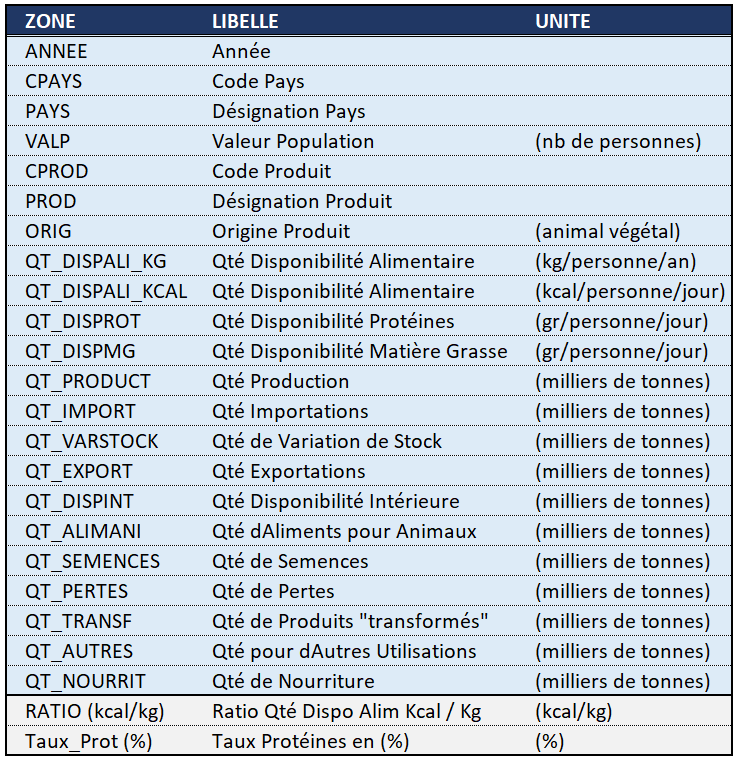

<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>QUESTION 6</u></font> : Calcul de la Disponibilité Intérieure mondiale pour les Végétaux

Exprimer le résultat en kcal

On recupère le dataframe "gen" utilisé précédemment, on ne garde que les lignes "vegetaux" et on calcul le [QT_DISPINT]  
Ici le Ratio est en ((kcal/kg/pers/an), la QT_DISPINT est en milliers_tonnes/pays/an.  

ATTENTION :   
- Selectionner les lignes de type ['ORIG'] == 'vegetal'   (ou supprimer lignes "animal")
- Supprimer les lignes RATIO=0  
- Supprimer les lignes QT_DISPINT = 0
- Supprimer lies lignes "inf"inite values


- Calcul par pays/produit de QT_DI_VEG_KCAL1 (en Millions kcal/an ) avec
      QT_DI_VEG_KCAL1 =  QT_DISPINT  *  RATIO(kcal/kg)

- Calcul par pays/produit de QT_DI_VEG_KCAL2 (en kcal/jour)
      QT_DI_VEG_KCAL2 =  (QT_DISPINT  *  RATIO(kcal/kg) * 1'000'000  )  /   (VALP*365)

In [36]:
q6 = gen[['PAYS', 'VALP', 'PROD', 'ORIG', 'QT_DISPINT', 'RATIO(kcal/kg)', 'Taux_Prot(%)']].copy()
q6.drop(q6[q6.ORIG == 'animal'].index, inplace=True)

q6['QT_DISPINT'] = q6['QT_DISPINT'].fillna(0)
q6['RATIO(kcal/kg)'] = q6['RATIO(kcal/kg)'].fillna(0)

q6['QT_DI_VEG_KCAL1'] = (q6['QT_DISPINT']*q6['RATIO(kcal/kg)'])
q6['QT_DI_VEG_KCAL2'] = (q6['QT_DI_VEG_KCAL1']*1000000)/(q6['VALP']*365)
q6.head()

,PAYS,VALP,PROD,ORIG,QT_DISPINT,RATIO(kcal/kg),Taux_Prot(%),QT_DI_VEG_KCAL1,QT_DI_VEG_KCAL2
0,Afghanistan,30552000,Blé,vegetal,"5,992.00","3,118.55",8.41,"18,686,341.63","1,675.68"
1,Afghanistan,30552000,Orge,vegetal,524.00,"3,250.00",9.88,"1,703,000.00",152.72
2,Afghanistan,30552000,Maïs,vegetal,313.00,"3,066.00",8.18,"959,658.00",86.06
3,Afghanistan,30552000,Millet,vegetal,13.00,"2,737.50",7.30,"35,587.50",3.19
4,Afghanistan,30552000,"Céréales, Autres",vegetal,0.00,0.00,nan,0.00,0.00


#####   <font color='#61210B'>Formule Dispo intérieure annuelle mondiale / personne (en kcal)

- DI_VEG(kcal/p/j) = Sum(QT_DI_VEG_KCAL1)* 1'000'000 /( 365 * pop_monde )  

In [37]:
DI_VEG_kcal_p_j = q6['QT_DI_VEG_KCAL1'].sum()*1000000 / (365*pop_monde)
parm1 = "Disponibilité Intérieure Mondiale des 'végétaux' exprimée en Kcal: "
Markdown('<strong>{}</strong>{}{}'.format(parm1, round(DI_VEG_kcal_p_j, 3), " (Kcal/p/j)"))

<strong>Disponibilité Intérieure Mondiale des 'végétaux' exprimée en Kcal: </strong>4763.629 (Kcal/p/j)

<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>QUESTION 7</u></font> : Nb humains nourris en fonction de Disponibilité Intérieure mondiale des Végétaux

En calories, protéines, et pourcentage.  
  
<u>Estimation basée sur wiki et FAO </u>(source: https://fr.wikipedia.org/wiki/Prot%C3%A9ine#Quantit%C3%A9s_recommand%C3%A9es ) :  
Les besoins moyens en protéines ont été définis par la FAO qui recommande 49 g de protéines pour les hommes adultes et 41 pour les femmes (47 si enceintes, 58,5 si allaitantes)  
Il est extrémement difficile de trouver un chiffre "moyen" tant il y a de paramètres a prendre en compte.  
Le sexe (homme/femme), le poids de la personne, le pays dans lequel elle vit, etc...   
Pour l'exercice je vais prendre les données Wiki de cette source : https://fr.wikipedia.org/wiki/Apports_journaliers_recommand%C3%A9s  
Énergie 	2 000 kcal  
Protéines 	50 g



On applique le même principe qu'à la question 6 pour les protéines  

- Calcul par pays/produit de QT_DI_VEG_PROT avec
      QT_DI_VEG_PROT1 =  QT_DISPINT  *  Taux_Prot(%) * 1000 / 100

- Calcul en gr Protéines/jour
      QT_DI_VEG_PROT2 =  (QT_DI_VEG_PROT1  * 1'000'000  )  /   (VALP*365)



In [38]:
q7 = gen[['PAYS', 'VALP', 'PROD', 'ORIG', 'QT_DISPINT', 'RATIO(kcal/kg)', 'Taux_Prot(%)']].copy()
q7.drop(q7[q7.ORIG == 'animal'].index, inplace=True)

q7['QT_DISPINT'] = q7['QT_DISPINT'].fillna(0)
q7['Taux_Prot(%)'] = q7['Taux_Prot(%)'].fillna(0)

q7['QT_DI_VEG_PROT1'] = (q7['QT_DISPINT']*q7['Taux_Prot(%)']*1000) / 100 
q7['QT_DI_VEG_PROT2'] = (q7['QT_DI_VEG_PROT1']*1000000)/(q7['VALP']*365)
q7.head()


,PAYS,VALP,PROD,ORIG,QT_DISPINT,RATIO(kcal/kg),Taux_Prot(%),QT_DI_VEG_PROT1,QT_DI_VEG_PROT2
0,Afghanistan,30552000,Blé,vegetal,"5,992.00","3,118.55",8.41,"503,807.79",45.18
1,Afghanistan,30552000,Orge,vegetal,524.00,"3,250.00",9.88,"51,745.00",4.64
2,Afghanistan,30552000,Maïs,vegetal,313.00,"3,066.00",8.18,"25,590.88",2.29
3,Afghanistan,30552000,Millet,vegetal,13.00,"2,737.50",7.30,949.00,0.09
4,Afghanistan,30552000,"Céréales, Autres",vegetal,0.00,nan,0.00,0.00,0.00


#####   <font color='#61210B'>Formule Dispo intérieure annuelle mondiale / personne (en gr Protéines) :
- DI_VEG(prot/p/j) = ∑(QT_DI_VEG_PROT1)* 1'000'000 /( 365 * pop_monde )

In [39]:
DI_VEG_prot_p_j = q7['QT_DI_VEG_PROT1'].sum()*1000000 / (365*pop_monde)
parm1 = "Disponibilité Intérieure Mondiale des 'végétaux' exprimée en protéines: "
Markdown('<strong>{}</strong>{}{}'.format(parm1, round(DI_VEG_prot_p_j, 3), " (gr Protéines/p/j)"))


<strong>Disponibilité Intérieure Mondiale des 'végétaux' exprimée en protéines: </strong>114.328 (gr Protéines/p/j)

#####   <font color='#61210B'>En exprimant ces resulats en (%) de la population mondiale :   
Base de l'enoncé ci-dessus : 
- Énergie 	2 000 kcal  
- Protéines 	50 g

In [40]:
var_wiki_nrj = 2000     # Variable - valeur wiki (en kcal) des besoins journalier d'un être humain
var_wiki_prot = 50      # Variable - valeur wiki (en gr protéines) des besoins journalier d'un être humain

In [41]:
xcal = (DI_VEG_kcal_p_j*pop_monde)*100/(pop_monde*var_wiki_nrj)
xprot = (DI_VEG_prot_p_j*pop_monde)*100/(pop_monde*var_wiki_prot)
hcal = (xcal/100) * pop_monde
hprot = (xprot/100) * pop_monde

In [42]:
display(HTML('<h3>Disponibilité Intérieure Mondiale de végétaux en Kcal</h3>'))
parm1 = str(round(xcal,2))
parm2 = "(%) des besoins mondiaux. Soit "
parm3 = str('{:15,.0f}'.format(hcal))
parm4 = " humains"
Markdown('<strong>{}</strong>{}<strong>{}</strong>{}'.format(parm1, parm2, parm3, parm4))

<strong>238.18</strong>(%) des besoins mondiaux. Soit <strong> 16,666,330,855</strong> humains

In [43]:
display(HTML('<h3>Disponibilité Intérieure Mondiale de végétaux en Protéines</h3>'))
parm1 = str(round(xprot,2))
parm2 = "(%) des besoins mondiaux. Soit "
parm3 = str('{:15,.0f}'.format(hprot))
parm4 = " humains"
Markdown('<strong>{}</strong>{}<strong>{}</strong>{}'.format(parm1, parm2, parm3, parm4))

<strong>228.66</strong>(%) des besoins mondiaux. Soit <strong> 15,999,771,277</strong> humains

<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>QUESTION 8</u></font> : Nb humains nourris en fonction de Disponibilité Alim. mondiale des Végétaux, nourriture végétale destinée aux animaux, et pertes de produits végétaux

En calories, protéines, et pourcentage.  
  
Comme pour les questions Q7/Q8, ici on va prendre la somme des 3 éléments ci-dessus en termes de quantité

#####   <font color='#61210B'>Calculs en kcal

In [44]:
q8 = gen[['PAYS', 'VALP', 'PROD', 'ORIG', 'QT_NOURRIT', 'QT_ALIMANI', 'QT_PERTES', 'RATIO(kcal/kg)', 
         'Taux_Prot(%)']].copy()
q8.drop(q8[q8.ORIG == 'animal'].index, inplace=True)
# Remplacer les valeurs NAN par 0 vant d'en faire la somme
q8.QT_NOURRIT = q8.QT_NOURRIT.fillna(0)
q8.QT_ALIMANI = q8.QT_ALIMANI.fillna(0)
q8.QT_PERTES = q8.QT_PERTES.fillna(0)
q8['RATIO(kcal/kg)'] = q8['RATIO(kcal/kg)'].fillna(0)

# Memorisation de la somme des Dispo Alim. nécessaires à la question
q8['QT_DA_CALC'] = q8['QT_NOURRIT'] + q8['QT_ALIMANI'] + q8['QT_PERTES']


q8['QT_DA_VEG_KCAL'] = (q8['QT_DA_CALC']*q8['RATIO(kcal/kg)'])
DA_VEG_kcal_p_j = q8['QT_DA_VEG_KCAL'].sum()*1000000 / (365*pop_monde)
q8.head()

,PAYS,VALP,PROD,ORIG,QT_NOURRIT,QT_ALIMANI,QT_PERTES,RATIO(kcal/kg),Taux_Prot(%),QT_DA_CALC,QT_DA_VEG_KCAL
0,Afghanistan,30552000,Blé,vegetal,"4,895.00",0.00,775.00,"3,118.55",8.41,"5,670.00","17,682,169.07"
1,Afghanistan,30552000,Orge,vegetal,89.00,360.00,52.00,"3,250.00",9.88,501.00,"1,628,250.00"
2,Afghanistan,30552000,Maïs,vegetal,76.00,200.00,31.00,"3,066.00",8.18,307.00,"941,262.00"
3,Afghanistan,30552000,Millet,vegetal,12.00,0.00,1.00,"2,737.50",7.30,13.00,"35,587.50"
4,Afghanistan,30552000,"Céréales, Autres",vegetal,0.00,0.00,0.00,0.00,nan,0.00,0.00


#####   <font color='#61210B'>Calculs en gr de Protéines

In [45]:
q8 = gen[['PAYS', 'VALP', 'PROD', 'ORIG', 'QT_NOURRIT', 'QT_ALIMANI', 'QT_PERTES', 'RATIO(kcal/kg)', 
         'Taux_Prot(%)']].copy()
# Remplacer les valeurs NAN par 0 vant d'en faire la somme
q8.QT_NOURRIT = q8.QT_NOURRIT.fillna(0)
q8.QT_ALIMANI = q8.QT_ALIMANI.fillna(0)
q8.QT_PERTES = q8.QT_PERTES.fillna(0)

# Memorisation de la somme des Dispo Alim. nécessaires à la question
q8['QT_DA_CALC'] = q8['QT_NOURRIT'] + q8['QT_ALIMANI'] + q8['QT_PERTES']
q8.drop(q8[q8.ORIG == 'animal'].index, inplace=True)
q8.drop(q8[q8['QT_DA_CALC'] == 0].index, inplace=True)
q8.drop(q8[q8['Taux_Prot(%)'] == 0].index, inplace=True)
q8['QT_DA_VEG_PROT'] = (q8['QT_DA_CALC']*q8['Taux_Prot(%)']*1000) / 100 
DA_VEG_prot_p_j = q8['QT_DA_VEG_PROT'].sum()*1000000 / (365*pop_monde)
q8.head()

,PAYS,VALP,PROD,ORIG,QT_NOURRIT,QT_ALIMANI,QT_PERTES,RATIO(kcal/kg),Taux_Prot(%),QT_DA_CALC,QT_DA_VEG_PROT
0,Afghanistan,30552000,Blé,vegetal,"4,895.00",0.00,775.00,"3,118.55",8.41,"5,670.00","476,734.01"
1,Afghanistan,30552000,Orge,vegetal,89.00,360.00,52.00,"3,250.00",9.88,501.00,"49,473.75"
2,Afghanistan,30552000,Maïs,vegetal,76.00,200.00,31.00,"3,066.00",8.18,307.00,"25,100.32"
3,Afghanistan,30552000,Millet,vegetal,12.00,0.00,1.00,"2,737.50",7.30,13.00,949.00
5,Afghanistan,30552000,Pommes de Terre,vegetal,230.00,0.00,9.00,727.09,1.21,239.00,"2,896.25"


In [46]:
display(HTML('<h4>Disponibilité Alimentaire Mondiale de végétaux + Nourriture Animaux + Pertes</h4>'))
parm1 = str(round(DA_VEG_kcal_p_j,3)) + " (kcal/pers/jour)"
parm2 = str(round(DA_VEG_prot_p_j,3)) + " (prot/pers/jour)"
Markdown('{}<br/>{}'.format(parm1, parm2))

3590.378 (kcal/pers/jour)<br/>80.021 (prot/pers/jour)

#####   <font color='#61210B'>Expression des resulats en (%) de la population mondiale. </font>  ---  Base utilisée : 
- Énergie 	2 000 kcal  
- Protéines 	50 g

In [47]:
xcal = (DA_VEG_kcal_p_j*pop_monde)*100/(pop_monde*var_wiki_nrj)
xprot = (DA_VEG_prot_p_j*pop_monde)*100/(pop_monde*var_wiki_prot)
hcal = (xcal/100) * pop_monde
hprot = (xprot/100) * pop_monde

In [48]:
display(HTML('<h3>Disponibilité Alimentaire Mondiale de végétaux + Nourriture Animaux + Pertes en Kcal</h3>'))
parm1 = "Elle représente "
parm2 = str(round(xcal,2))
parm3 = "(%) des besoins mondiaux. Soit "
parm4 = str('{:15,.0f}'.format(hcal))
parm5 = " humains"
Markdown('{}<strong>{}</strong>{}<strong>{}</strong>{}'.format(parm1, parm2, parm3, parm4,parm5))

Elle représente <strong>179.52</strong>(%) des besoins mondiaux. Soit <strong> 12,561,524,329</strong> humains

In [49]:
display(HTML('<h3>Disponibilité Alimentaire Mondiale de végétaux + Nourriture Animaux + Pertes en Protéines</h3>'))
parm1 = "Elle représente "
parm2 = str(round(xprot,2))
parm3 = "(%) des besoins mondiaux. Soit "
parm4 = str('{:15,.0f}'.format(hprot))
parm5 = " humains"
Markdown('{}<strong>{}</strong>{}<strong>{}</strong>{}'.format(parm1, parm2, parm3, parm4,parm5))

Elle représente <strong>160.04</strong>(%) des besoins mondiaux. Soit <strong> 11,198,637,516</strong> humains

<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>QUESTION 9</u></font> : Nb humains nourris en fonction de Disponibilité Alimentaire Mondiale

En calories, protéines, et pourcentage.  
  
Ici, pas de calcul avec les ratio et taux(%)Prot comme pour les questions précédentes.
On va prendre les données "standards" de la FAO, soient dans notre dataframe "gen", les colonnes :  
- **QT_DISPALI_KCAL**  - Qté Disponibilité Alimentaire d'un produit/pays (en kcal/pers/jour)
- **QT_DISPROT**  - Qté Disponibilité Protéines d'un produit/pays (en gr/pers/jour)



In [50]:
q9 = gen[['CPAYS', 'PAYS', 'CPROD', 'PROD', 'ORIG', 'QT_DISPALI_KCAL', 'QT_DISPROT']].copy()
q9.head()

,CPAYS,PAYS,CPROD,PROD,ORIG,QT_DISPALI_KCAL,QT_DISPROT
0,2,Afghanistan,2511,Blé,vegetal,"1,369.00",36.91
1,2,Afghanistan,2513,Orge,vegetal,26.00,0.79
2,2,Afghanistan,2514,Maïs,vegetal,21.00,0.56
3,2,Afghanistan,2517,Millet,vegetal,3.00,0.08
4,2,Afghanistan,2520,"Céréales, Autres",vegetal,0.00,0.00


#####   <font color='#61210B'>On regroupe par pays, et on fait la somme des kcal et protéines

In [51]:
q9 = q9.groupby(['CPAYS', 'PAYS']).sum().reset_index()
q9.head()

,CPAYS,PAYS,CPROD,QT_DISPALI_KCAL,QT_DISPROT
0,1,Arménie,237075,"2,924.00",90.06
1,2,Afghanistan,157588,"2,087.00",58.26
2,3,Albanie,242087,"3,188.00",111.37
3,4,Algérie,244522,"3,293.00",91.92
4,7,Angola,210872,"2,474.00",57.27


#####   <font color='#61210B'>On peut maintenant faire une moyenne mondiake des kcal et proteines et la comparer à notre base

In [52]:
DA_KCAL_p_j = q9['QT_DISPALI_KCAL'].mean()
DA_PROT_p_j = q9['QT_DISPROT'].mean()
print("Dispo_Alimentaire_Mondiale(kcal/p/j) = ", round(DA_KCAL_p_j,3))
print("Dispo_Alimentaire_Mondiale(prot/p/j) = ", round(DA_PROT_p_j,3))

Dispo_Alimentaire_Mondiale(kcal/p/j) =  2847.368
Dispo_Alimentaire_Mondiale(prot/p/j) =  81.3


In [53]:
parm1 = "Disponibilité Alimentaire Mondiale exprimée en Kcal: "
parm2 = "Disponibilité Alimentaire Mondiale exprimée en Protéines: "
Markdown('{}<strong>{}</strong>{}<br/>{}<strong>{}</strong>{}'.format
         (parm1, round(DA_KCAL_p_j, 3)," (Kcal/pers/jour)",
          parm2, round(DA_PROT_p_j, 3), " (gr Prot./pers/jour)"))

Disponibilité Alimentaire Mondiale exprimée en Kcal: <strong>2847.368</strong> (Kcal/pers/jour)<br/>Disponibilité Alimentaire Mondiale exprimée en Protéines: <strong>81.3</strong> (gr Prot./pers/jour)

#####   <font color='#61210B'>Expression des resulats en (%) de la population mondiale. </font>  ---  Base utilisée : 
- Énergie 	2 000 kcal  
- Protéines 	50 g

In [54]:
xcal = (DA_KCAL_p_j*pop_monde)*100/(pop_monde*var_wiki_nrj)
xprot = (DA_PROT_p_j*pop_monde)*100/(pop_monde*var_wiki_prot)
hcal = (xcal/100) * pop_monde
hprot = (xprot/100) * pop_monde

In [55]:
display(HTML('<h3>Disponibilité Alimentaire Mondiale en Kcal</h3>'))
parm1 = "Elle représente "
parm2 = str(round(xcal,2))
parm3 = "(%) des besoins mondiaux. Soit "
parm4 = str('{:15,.0f}'.format(hcal))
parm5 = " humains"
Markdown('{}<strong>{}</strong>{}<strong>{}</strong>{}'.format(parm1, parm2, parm3, parm4,parm5))

Elle représente <strong>142.37</strong>(%) des besoins mondiaux. Soit <strong>  9,961,980,426</strong> humains

In [56]:
display(HTML('<h3>Disponibilité Alimentaire Mondiale en Protéines</h3>'))
parm1 = "Elle représente "
parm2 = str(round(xprot,2))
parm3 = "(%) des besoins mondiaux. Soit "
parm4 = str('{:15,.0f}'.format(hprot))
parm5 = " humains"
Markdown('{}<strong>{}</strong>{}<strong>{}</strong>{}'.format(parm1, parm2, parm3, parm4,parm5))

Elle représente <strong>162.6</strong>(%) des besoins mondiaux. Soit <strong> 11,377,595,776</strong> humains

<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>QUESTION 10</u></font> : Proportion de la population mondiale considérée en "sous-nutrition" - Année 2013


#####   <font color='#61210B'>Mise en forme du Dataframe ssn
- Suppression de colonnes inutiles
- Update de valeurs plus adequates (année, nb personnes)
- Remplacer les NAN par '0' sur colonne numérique
- Exclure la chine (code=351) car doublons avec autres lignes "chines" (voir question 1)

In [57]:
q10 = ssn[['ANNEE', 'CZONE', 'ZONE', 'VAL', 'UNIT']].copy()
q10['NB_PERS_SSN'] = q10['VAL'] * 1000000
q10.drop(columns=['VAL', 'UNIT'], inplace=True)
q10.drop(q10[q10['ANNEE']=='2015-2017'].index, inplace=True)
q10.drop(q10[q10.CZONE == varcp_chine].index, inplace=True)
q10['ANNEE'] = np.where(q10['ANNEE']=='2012-2014', 2013, q10['ANNEE'])
q10.NB_PERS_SSN = q10.NB_PERS_SSN.fillna(0)
q10.head()

,ANNEE,CZONE,ZONE,NB_PERS_SSN
0,2013,2,Afghanistan,"8,100,000.00"
2,2013,202,Afrique du Sud,"2,600,000.00"
4,2013,3,Albanie,"200,000.00"
6,2013,4,Algérie,"1,800,000.00"
8,2013,79,Allemagne,0.00


#####   <font color='#61210B'>Resultat (%) population mondiale sous-alimentée

In [58]:
TOT_POP_SSN = q10['NB_PERS_SSN'].sum()
prop = (TOT_POP_SSN*100/pop_monde)
print("Nb de personnes sous alimentée en 2013 : ", '{:10,.0f}'.format(TOT_POP_SSN), 
      "  - Cela représente ", round(prop,2), "(%) de la population mondiale")


Nb de personnes sous alimentée en 2013 :  739,700,000   - Cela représente  10.57 (%) de la population mondiale


In [59]:
display(HTML('<h3>Nombre de Personnes sous-alimentées en 2013</h3>'))
parm1 = str('{:10,.0f}'.format(TOT_POP_SSN))
parm2 = " . Cela représente "
parm3 = str(round(prop,2))
parm4 = "(%) de la population mondiale"
Markdown('<strong>{}</strong>{}<strong>{}</strong>{}'.format(parm1, parm2, parm3, parm4))

<strong>739,700,000</strong> . Cela représente <strong>10.57</strong>(%) de la population mondiale

#####   <font color='#61210B'> /// Export de la liste des pays en sous-nutrition dans un dataframe pour les questions Q12-13-14  /// </font> Nom du DF = ssn1

In [60]:
ssn1 = q10[q10['NB_PERS_SSN']!=0].copy()

#####   <font color='#61210B'> /// Export du dataframe q10 dans un fichier Excel pour contrôle futurs/// </font> Nom du fichier = PJ3_Q10-Sous_Nutrition_out.xlsx

In [61]:
writer = pd.ExcelWriter("OUTFILES/PJ3_Q10-Sous_Nutrition_out.xlsx")
q10.to_excel(writer,'Sheet1')
writer.save()

<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>QUESTION 11</u></font> : Proportion de céréales déstinées à l'alimentation animale - Année 2013

- Constitution de la liste de produits "type céréale" selon la FAO  
- Calcul de la proportion sur ce périmètre

In [62]:
cer.head()

,CPAYS,PAYS,CELEM,ELEMENT,CPROD,PROD,ANNEE,UNIT,VAL
0,2,Afghanistan,5511,Production,2511,Blé,2013,Milliers de tonnes,"5,169.00"
1,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2013,Milliers de tonnes,"1,173.00"
2,2,Afghanistan,5072,Variation de stock,2511,Blé,2013,Milliers de tonnes,-350.00
3,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé,2013,Milliers de tonnes,"5,992.00"
4,2,Afghanistan,5527,Semences,2511,Blé,2013,Milliers de tonnes,322.00


#####   <font color='#61210B'>Recherche sur sur dataframe "cer"
- Liste des codes produits de type Céréales

In [63]:
q11sel = cer['CPROD'].unique()
q11sel

array([2511, 2805, 2513, 2514, 2517, 2520, 2515, 2516, 2518], dtype=int64)

#####   <font color='#61210B'>Preparation des données à partir du dataframe principal "gen" 
    
- Selection des zones utiles : QT_NOURRIT (homme) & QT_ALIMANI (animal)
- On remplace les valeurs NAN par 0 pour ne pas fausser les calculs  
- On fait une somme Totale des céréales destinées à l'alimentation  (QT_CER_ALIM)

In [64]:
tp11 = gen[['PAYS', 'VALP', 'CPROD', 'PROD', 'ORIG', 'QT_NOURRIT', 'QT_ALIMANI']].copy()
tp11.QT_NOURRIT = tp11.QT_NOURRIT.fillna(0)
tp11.QT_ALIMANI = tp11.QT_ALIMANI.fillna(0)
tp11['QT_CER_ALIM'] = tp11['QT_NOURRIT'] + tp11['QT_ALIMANI']
tp11.head()

,PAYS,VALP,CPROD,PROD,ORIG,QT_NOURRIT,QT_ALIMANI,QT_CER_ALIM
0,Afghanistan,30552000,2511,Blé,vegetal,"4,895.00",0.00,"4,895.00"
1,Afghanistan,30552000,2513,Orge,vegetal,89.00,360.00,449.00
2,Afghanistan,30552000,2514,Maïs,vegetal,76.00,200.00,276.00
3,Afghanistan,30552000,2517,Millet,vegetal,12.00,0.00,12.00
4,Afghanistan,30552000,2520,"Céréales, Autres",vegetal,0.00,0.00,0.00


#####   <font color='#61210B'>Application du filtre des produits céréaliers sur ce dataframe temp</font>  --- Actions :

- 1°) Somme "mondiale" des colonnes numeriques : 
    - TOT_NOURRIT = ∑ QT_NOURRIT
    - TOT_ALIMANI = ∑ QT_ALIMANI
    - TOT_CER_ALIM = ∑ QT_CER_ALIM
- 2°) Calcul Proportion avec (TOT_ALIMANI) / (TOT_CER_ALIM)


In [65]:
q11 = tp11[tp11['CPROD'].isin(q11sel)]
q11.head()

,PAYS,VALP,CPROD,PROD,ORIG,QT_NOURRIT,QT_ALIMANI,QT_CER_ALIM
0,Afghanistan,30552000,2511,Blé,vegetal,"4,895.00",0.00,"4,895.00"
1,Afghanistan,30552000,2513,Orge,vegetal,89.00,360.00,449.00
2,Afghanistan,30552000,2514,Maïs,vegetal,76.00,200.00,276.00
3,Afghanistan,30552000,2517,Millet,vegetal,12.00,0.00,12.00
4,Afghanistan,30552000,2520,"Céréales, Autres",vegetal,0.00,0.00,0.00


#####   <font color='#61210B'>Calcul de la proportion (%)

In [66]:
TOT_NOURRIT = q11['QT_NOURRIT'].sum()
TOT_ALIMANI = q11['QT_ALIMANI'].sum()
TOT_CER_ALIM = q11['QT_CER_ALIM'].sum()
PROP = TOT_ALIMANI * 100 / TOT_CER_ALIM

In [67]:
display(HTML("<h3>La proportion de céréales destinées à l'alimentation animale en 2013 est :</h3>"))
parm1 = str(round(PROP,2))
parm2 = "(%) de la production mondiale. Soit "
parm3 = " Millions de tonnes"
Markdown('<strong>{}</strong>{}<strong>{}</strong>{}'.format(parm1, parm2, round(TOT_ALIMANI/1000), parm3))

<strong>45.91</strong>(%) de la production mondiale. Soit <strong>874.0</strong> Millions de tonnes

<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>Préparation des questions 12/13/14</u></font>

Sélection, parmi les données des bilans alimentaires, des informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition, pour une année choisie.

Repérage des 15 produits les plus exportés par ce groupe de pays sur l'année choisie.

Parmi les données des bilans alimentaires au niveau mondial, sélection des 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné sur l'année choisie)

Regroupement des importations par produit, afin d'avoir une table contenant 1 ligne pour chacun des 15 produits.  
Enfin, calcul pour chaque produit des 2 quantités suivantes :

- le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.
- le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine)

#####   <font color='#61210B'>Jointure Gauche entre :
- Gauche >> Liste des pays en sous-nutrition - Dataframe **ssn1**
- Droite >> Données Bilans Alimentaires      - Dataframe **gen**    
    

In [68]:
# Renommer les colonnes pour avoir les mêmes clefs avant jointure
ssn1.columns = ["ANNEE", "CPAYS", "PAYS", "NBPERS"]
# Changer le type de la colonne en float64 avant merge
ssn1[['ANNEE']] = ssn1[['ANNEE']].astype(int)

In [69]:
tp12 = gen[['CPAYS', 'PAYS', 'CPROD', 'PROD', 'QT_IMPORT', 'QT_EXPORT', 
            'QT_DISPINT', 'QT_AUTRES', 'QT_ALIMANI', 'QT_NOURRIT']].copy()
tp = pd.merge(ssn1, tp12, how="left")
tp['QT_IMPORT'] = tp['QT_IMPORT'].fillna(0)
tp['QT_EXPORT'] = tp['QT_EXPORT'].fillna(0)
tp['QT_DISPINT'] = tp['QT_DISPINT'].fillna(0)
tp['QT_ALIMANI'] = tp['QT_ALIMANI'].fillna(0)
tp['QT_AUTRES'] = tp['QT_AUTRES'].fillna(0)
tp['QT_NOURRIT'] = tp['QT_NOURRIT'].fillna(0)
tp.head()

,ANNEE,CPAYS,PAYS,NBPERS,CPROD,PROD,QT_IMPORT,QT_EXPORT,QT_DISPINT,QT_AUTRES,QT_ALIMANI,QT_NOURRIT
0,2013,2,Afghanistan,"8,100,000.00",2511,Blé,"1,173.00",0.00,"5,992.00",0.00,0.00,"4,895.00"
1,2013,2,Afghanistan,"8,100,000.00",2513,Orge,10.00,0.00,524.00,0.00,360.00,89.00
2,2013,2,Afghanistan,"8,100,000.00",2514,Maïs,1.00,0.00,313.00,0.00,200.00,76.00
3,2013,2,Afghanistan,"8,100,000.00",2517,Millet,0.00,0.00,13.00,0.00,0.00,12.00
4,2013,2,Afghanistan,"8,100,000.00",2520,"Céréales, Autres",0.00,0.00,0.00,0.00,0.00,0.00


#####   <font color='#61210B'>Détermination des 15 produits les plus exportés sur cette selection de pays
- Regroupement par Produit des QT exportées
- Tri décroissant des 15 premières lignes
    

In [70]:
s15 = tp.groupby(['CPROD', 'PROD'])['QT_EXPORT'].sum().reset_index()
s15 = s15.sort_values(['QT_EXPORT'], ascending=[False]).head(15)
s15.columns = ["CPROD", "PROD", "TOT_EXPORT"]
s15

,CPROD,PROD,TOT_EXPORT
38,2577,Huile de Palme,"46,285.00"
2,2514,Maïs,"37,888.00"
9,2532,Manioc,"35,843.00"
95,2805,Riz (Eq Blanchi),"32,787.00"
16,2542,Sucre Eq Brut,"25,237.00"
0,2511,Blé,"24,841.00"
47,2605,"Légumes, Autres","19,948.00"
52,2615,Bananes,"17,805.00"
58,2625,"Fruits, Autres","14,590.00"
96,2848,Lait - Excl Beurre,"14,486.00"


#####   <font color='#61210B'>Pour ces 15 produits sélectionnés, choisir les 200 plus grandes importations
- 1 importation = une quantité d'un produit donné importée par un pays donné

In [71]:
s200 = pd.merge(s15, tp, how="left")
s200 = s200.sort_values(['QT_IMPORT'], ascending=[False]).head(200)
s200.tail()

,CPROD,PROD,TOT_EXPORT,ANNEE,CPAYS,PAYS,NBPERS,QT_IMPORT,QT_EXPORT,QT_DISPINT,QT_AUTRES,QT_ALIMANI,QT_NOURRIT
1136,2601,Tomates,"8,901.00",2013,194,Arabie saoudite,"1,600,000.00",394.00,23.00,916.00,0.00,0.00,848.00
670,2615,Bananes,"17,805.00",2013,9,Argentine,"1,500,000.00",392.00,0.00,572.00,0.00,0.00,532.00
465,2542,Sucre Eq Brut,"25,237.00",2013,222,Tunisie,"500,000.00",385.00,8.00,373.00,0.00,0.00,373.00
1231,2617,Pommes,"7,786.00",2013,194,Arabie saoudite,"1,600,000.00",380.00,59.00,320.00,0.00,0.00,302.00
654,2605,"Légumes, Autres","19,948.00",2013,216,Thaïlande,"6,100,000.00",378.00,464.00,"3,557.00",0.00,0.00,"3,207.00"


#####   <font color='#61210B'>On regroupe ces 200 lignes à nouveau par produit pour faire des calculs de ratio suivants :

-   le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.
-   le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine)


In [72]:
q12 = s200.groupby(['CPROD', 'PROD'])['QT_IMPORT', 'QT_EXPORT', 'QT_DISPINT', 'QT_AUTRES', 
                                      'QT_ALIMANI', 'QT_NOURRIT'].sum().reset_index()
q12.columns = ['CPROD', 'PROD', 'TOT_IMPORT', 'TOT_EXPORT', 'TOT_DISPINT', 'TOT_AUTRES', 
                                      'TOT_ALIMANI', 'TOT_NOURRIT']
q12.head()

,CPROD,PROD,TOT_IMPORT,TOT_EXPORT,TOT_DISPINT,TOT_AUTRES,TOT_ALIMANI,TOT_NOURRIT
0,2511,Blé,"96,333.00","7,769.00","294,641.00","9,892.00","44,858.00","218,474.00"
1,2514,Maïs,"56,510.00","1,333.00","334,220.00","40,411.00","215,133.00","49,207.00"
2,2532,Manioc,"33,566.00","26,161.00","66,296.00","21,068.00","25,152.00","15,313.00"
3,2542,Sucre Eq Brut,"31,462.00","6,554.00","73,611.00","3,509.00",0.00,"58,931.00"
4,2555,Soja,"76,334.00",308.00,"89,821.00",524.00,"10,668.00","6,493.00"


<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>QUESTION 12</u></font> : 3 Produits ayant les plus forts ratios 
- #### Ratio 1 = entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.   
- #### Ratio 2 = entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine).

In [73]:
q12['Ratio1(%)'] = q12['TOT_AUTRES'] *100 / q12['TOT_DISPINT']
q12['Ratio2(%)'] = q12['TOT_ALIMANI'] *100 / (q12['TOT_ALIMANI']+q12['TOT_NOURRIT'])
q12
#q12[(q12['CPROD'] == 2577)].head()

,CPROD,PROD,TOT_IMPORT,TOT_EXPORT,TOT_DISPINT,TOT_AUTRES,TOT_ALIMANI,TOT_NOURRIT,Ratio1(%),Ratio2(%)
0,2511,Blé,"96,333.00","7,769.00","294,641.00","9,892.00","44,858.00","218,474.00",3.36,17.03
1,2514,Maïs,"56,510.00","1,333.00","334,220.00","40,411.00","215,133.00","49,207.00",12.09,81.38
2,2532,Manioc,"33,566.00","26,161.00","66,296.00","21,068.00","25,152.00","15,313.00",31.78,62.16
3,2542,Sucre Eq Brut,"31,462.00","6,554.00","73,611.00","3,509.00",0.00,"58,931.00",4.77,0.00
4,2555,Soja,"76,334.00",308.00,"89,821.00",524.00,"10,668.00","6,493.00",0.58,62.16
5,2577,Huile de Palme,"26,634.00","20,231.00","26,450.00","17,886.00",0.00,"8,283.00",67.62,0.00
6,2601,Tomates,802.00,23.00,"2,889.00",0.00,0.00,"2,586.00",0.00,0.00
7,2605,"Légumes, Autres","2,112.00",863.00,"14,565.00",47.00,1.00,"13,399.00",0.32,0.01
8,2611,"Oranges, Mandarines",595.00,321.00,322.00,0.00,0.00,313.00,0.00,0.00
9,2615,Bananes,"1,927.00",44.00,"14,255.00",21.00,0.00,"11,633.00",0.15,0.00


In [74]:
display(HTML("<h3>Les 3 Produits ayant le Ratio1(%) le plus élevé sont :</h3>"))
display(HTML("Ratio 1 = QT 'Autres utilisations'(Other uses) / QT Disponibilité Intérieure"))
q12.sort_values(['Ratio1(%)'], ascending=[False])[['PROD', 'Ratio1(%)']].head(3)

,PROD,Ratio1(%)
5,Huile de Palme,67.62
2,Manioc,31.78
1,Maïs,12.09


#####   <font color='#61210B'>Les 3 Produits ayant le Ratio2(%) le plus élevé sont :

In [75]:
display(HTML("<h3>Les 3 Produits ayant le Ratio2(%) le plus élevé sont :</h3>"))
display(HTML("Ratio 1 = QT Nourriture animale / (QT Nourriture animale + QT Nourriture humaine)"))
q12.sort_values(['Ratio2(%)'], ascending=[False])[['PROD', 'Ratio2(%)']].head(3)

,PROD,Ratio2(%)
1,Maïs,81.38
12,Poissons Pelagiques,66.16
4,Soja,62.16


<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>QUESTION 13</u></font> : Tonnes de Céréales libérées, si les USA baissent de 10% la production de produits animaliers

- Selection à partir du DataFrame général des lignes pour le Code Pays "Etats-Unis" (231)  

In [76]:
tp13 = gen[(gen['CPAYS'] == 231)][['CPAYS', 'PAYS', 'CPROD', 'PROD', 'QT_ALIMANI']].copy()
tp13.head()

,CPAYS,PAYS,CPROD,PROD,QT_ALIMANI
4842,231,États-Unis d'Amérique,2511,Blé,"6,196.00"
4843,231,États-Unis d'Amérique,2513,Orge,"1,440.00"
4844,231,États-Unis d'Amérique,2514,Maïs,"128,024.00"
4845,231,États-Unis d'Amérique,2515,Seigle,184.00
4846,231,États-Unis d'Amérique,2516,Avoine,"1,430.00"


- Jointure ou  Filtre sur la liste de produits de type "céréales" q11sel  (voir Question 11)

In [77]:
tp13['QT_ALIMANI'] = tp13['QT_ALIMANI'].fillna(0)
q13 = tp13[tp13['CPROD'].isin(q11sel)]
tot_prod_animali_usa = q13['QT_ALIMANI'].sum()
eco = 0.1 * (tot_prod_animali_usa * 1000)

In [78]:
display(HTML("<h3>En 2013, si les Etats-Unis avaient baissé leur production de produits animaliers de 10%,</h3>"))
parm1 = str('{:15,.0f}'.format(eco))
parm2 = " tonnes de céréales auraient été libérées"
Markdown('<strong>{}</strong>{}'.format(parm1,parm2))

<strong>     14,009,600</strong> tonnes de céréales auraient été libérées

<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>QUESTION 14</u></font> : Thaïlande  -  Calculs de proportions  :

- Proportion de manioc exportée
- Proportion de personnes en sous-nutrition

- Selection à partir du DataFrame général des lignes pour le Code Pays "Thailande" (216)  

In [79]:
q14 = gen[(gen['CPAYS'] == 216)][['CPAYS', 'PAYS', 'VALP', 'CPROD', 'PROD', 'QT_EXPORT', 'QT_PRODUCT']].copy()
q14['QT_EXPORT'] = q14['QT_EXPORT'].fillna(0)
q14.head()

,CPAYS,PAYS,VALP,CPROD,PROD,QT_EXPORT,QT_PRODUCT
14305,216,Thaïlande,67011000,2511,Blé,237.00,2.00
14306,216,Thaïlande,67011000,2513,Orge,0.00,95.00
14307,216,Thaïlande,67011000,2514,Maïs,591.00,"5,063.00"
14308,216,Thaïlande,67011000,2515,Seigle,0.00,nan
14309,216,Thaïlande,67011000,2516,Avoine,0.00,nan


- Calcul du Total des quantités exportées par la Thailande en tonnes (2013)

In [80]:
QT_TOT_EXP_THAI = q14['QT_EXPORT'].sum()
parm1 = "Total des Exportations de la Thailande en 2013 : "
parm2 = str('{:15,.2f}'.format(QT_TOT_EXP_THAI/1000))
parm3 = " (Millions de Tonnes)"
Markdown('<strong><u>{}</u><br/>{}</strong>{}'.format(parm1,parm2,parm3))


<strong><u>Total des Exportations de la Thailande en 2013 : </u><br/>          50.43</strong> (Millions de Tonnes)

- Recherche de la quantité de manioc exportée par la Thailande en tonnes (2013)  ---  Code Produit [2532]

In [81]:
QT_MANIOC_EXP_THAI = q14[(q14['CPROD'] == 2532)]['QT_EXPORT'].mean()
TX_MANIOC_EXP = QT_MANIOC_EXP_THAI *100 / QT_TOT_EXP_THAI

In [82]:
TX_MANIOC_PRD = q14[(q14['CPROD'] == 2532)]['QT_EXPORT'].max() / q14[(q14['CPROD'] == 2532)]['QT_PRODUCT'].max()

In [83]:
display(HTML("<h3><u>En 2013, la Thaïlande a exporté</u></h3>"))
parm1 = str('{:15,.1f}'.format(round(QT_MANIOC_EXP_THAI/1000,1)))
parm2 = " Millions de tonnes de manioc."
parm3 = " Cela représente "
parm4 = str('{:15,.1f}'.format(round(TX_MANIOC_EXP,3)))
parm5 = " (%) des Exports du pays."
parm6 = " Cela représente aussi "
parm7 = str('{:15,.2f}'.format(TX_MANIOC_PRD * 100))
parm8 = " (%) de la production annuelle de manioc"
Markdown('<strong>{}</strong>{}{}<strong>{}</strong>{}<br/>{}<strong>{}</strong>{}'.
         format(parm1,parm2,parm3,parm4,parm5,parm6,parm7,parm8))

<strong>           25.2</strong> Millions de tonnes de manioc. Cela représente <strong>           50.0</strong> (%) des Exports du pays.<br/> Cela représente aussi <strong>          83.41</strong> (%) de la production annuelle de manioc

- Recherche de la population de la Thailande dans le dataframe pop (2013)  ---  Code Pays [216]

In [84]:
POP_THAI = pop[(pop['CPAYS'] == 216)]['VALP'].max()

- Recherche du nombre de personne sous-alimentée en Thailande dans le dataframe des pays en sous-nutrition "ssn1" (exporté à la question 10)

In [85]:
NBP_SSN_THAI = ssn1[(ssn1['CPAYS'] == 216)]['NBPERS'].max()
TXP_SSN_THAI = NBP_SSN_THAI * 100 / POP_THAI

#####   <font color='#61210B'>Calcul de la proportion de personnes en sous-nutrition en thailande représente 9.1(%) de la population du pays (2013)

In [86]:
print(round(TXP_SSN_THAI,3), "(%), soit environ ", '{:8,.0f}'.format(NBP_SSN_THAI), " thaïlandais")

display(HTML("<h3><u>En 2013, la proportion de personnes en sous-nutrition en thailande représente</u></h3>"))
parm1 = str('{:15,.1f}'.format(TXP_SSN_THAI)) + "(%)"
parm2 = " de la population du pays. Soit "
parm3 = str('{:8,.0f}'.format(NBP_SSN_THAI))
Markdown('<strong>{}</strong>{}<strong>{}</strong>{}'.format(parm1,parm2,parm3," thaïlandais"))

9.103 (%), soit environ  6,100,000  thaïlandais


<strong>            9.1(%)</strong> de la population du pays. Soit <strong>6,100,000</strong> thaïlandais

<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>QUESTION 15 - 20</u></font> : EXPORT DES DATAFRAMES en CSV

- Pour utilisation avec SGBD SQL  :   MySQL ou SQLite3  
Ici nous rechargeons des données de la FAOSTAT pour prendre en compte plusieurs années (2012 et la dernière disponible)

In [87]:
%cd SQL

D:\DATA_ANALYST\WORK\#GITHUB\PJ3\SQL


#####   <font color='#61210B'>Table "population"
- Clé primaire proposée :  ANNEE / CPAYS

In [88]:
popsql = pd.read_csv("FAOSTAT_pop_2012-2017.csv")
popsql.columns = ["xx", "xx", "CPAYS", "PAYS", "xx", "xx", "xx", "xx", "xx", 
               "ANNEE", "UNIT", "VALP", "xx", "xx", "xx"]
popsql.drop(columns=['xx'], inplace=True)
popsql.drop(columns=['UNIT'], inplace=True)
popsql.drop(popsql[popsql.CPAYS == varcp_chine].index, inplace=True)
popsql['VALP'] = round(popsql['VALP'] * 1000)
cols =  ['ANNEE', 'CPAYS', 'PAYS', 'VALP']
popsql = popsql[cols]
popsql.to_csv('sql_population.csv', sep=',', encoding='utf-8', index=False)
popsql.head()

,ANNEE,CPAYS,PAYS,VALP
0,2012,2,Afghanistan,"30,696,958.00"
1,2013,2,Afghanistan,"31,731,688.00"
2,2017,2,Afghanistan,"35,530,081.00"
3,2012,202,Afrique du Sud,"52,998,213.00"
4,2013,202,Afrique du Sud,"53,767,396.00"


#####   <font color='#61210B'>Table "dispo_alim"
Selection avant export des colonnes requises :  
(pays, code_pays, année, produit, code_produit, origin, dispo_alim_tonnes, dispo_alim_kcal_p_j, dispo_prot, dispo_mat_gr)
- Clé Primaire proposée : ANNEE / CPAYS / CPROD

In [89]:
anisql = pd.read_csv("FAOSTAT_ani_2012-2013.zip")
anisql.columns = ["xx", "xx", "CPAYS", "PAYS", "CELEM", "ELEMENT", "CPROD", "PROD", "xx", 
               "ANNEE", "UNIT", "VAL", "xx", "xx"]
anisql.drop(columns=['xx'], inplace=True)
anisql["ORIG"] = "animal"

In [90]:
vegsql = pd.read_csv("FAOSTAT_veg_2012-2013.zip")
vegsql.columns = ["xx", "xx", "CPAYS", "PAYS", "CELEM", "ELEMENT", "CPROD", "PROD", "xx", 
               "ANNEE", "UNIT", "VAL", "xx", "xx"]
vegsql.drop(columns=['xx'], inplace=True)
vegsql["ORIG"] = "vegetal"

In [91]:
tempsql = anisql.append(vegsql)

In [92]:
gensql = tempsql.pivot_table(
    index=["CPAYS","PAYS","ANNEE", "CPROD","PROD","ORIG"],
    columns = ["CELEM", "ELEMENT", "UNIT"], values=["VAL"], aggfunc=sum)
gensql.columns = ['QT_DISPALI_KG', 'QT_DISPALI_KCAL', 'QT_DISPROT', 'QT_DISPMG', 'QT_VARSTOCK', 'QT_PERTES',
                'QT_TRANSF', 'QT_NOURRIT', 'QT_AUTRES', 'QT_DISPINT', 'QT_PRODUCT', 'QT_ALIMANI', 
                'QT_SEMENCES', 'QT_IMPORT', 'QT_EXPORT']
gensql = gensql.reset_index()
gensql.drop(gensql[gensql.CPAYS == varcp_chine].index, inplace=True)

In [93]:
cols =  ['ANNEE', 'CPAYS', 'PAYS', 'CPROD', 'PROD', 'ORIG',
            'QT_DISPALI_KG', 'QT_DISPALI_KCAL', 'QT_DISPROT', 'QT_DISPMG']
q16 = gensql.copy()
q16 = q16[cols]
q16['QT_DISPALI_KG'] = q16['QT_DISPALI_KG'] * 1000
q16.rename(columns={'QT_DISPALI_KG': 'QT_DISPALI_T'}, inplace=True)

q16.QT_DISPALI_T    = q16.QT_DISPALI_T.fillna(0)
q16.QT_DISPALI_KCAL = q16.QT_DISPALI_KCAL.fillna(0)
q16.QT_DISPROT      = q16.QT_DISPROT.fillna(0)
q16.QT_DISPMG       = q16.QT_DISPMG.fillna(0)

q16.to_csv('sql_dispo_alim.csv', sep=',', encoding='utf-8', index=False)
q16.head()

,ANNEE,CPAYS,PAYS,CPROD,PROD,ORIG,QT_DISPALI_T,QT_DISPALI_KCAL,QT_DISPROT,QT_DISPMG
0,2012,1,Arménie,2511,Blé,vegetal,"126,940.00",995.00,29.69,3.53
1,2012,1,Arménie,2513,Orge,vegetal,170.00,1.00,0.03,0.01
2,2012,1,Arménie,2514,Maïs,vegetal,30.00,0.00,0.01,0.00
3,2012,1,Arménie,2515,Seigle,vegetal,150.00,1.00,0.03,0.01
4,2012,1,Arménie,2516,Avoine,vegetal,320.00,2.00,0.08,0.03


#####   <font color='#61210B'>Table "equilibre_prod"
Selection avant export des colonnes requises :  
(pays, code_pays, année, produit, code_produit, dispo_int, alim_ani, semences, pertes, transfo, nourriture, autres_utilisations)
- Clé Primaire proposée : ANNEE / CPAYS / CPROD

In [94]:
q17 = gensql[['ANNEE', 'CPAYS', 'PAYS', 'CPROD', 'PROD', 'ORIG', 'QT_DISPINT', 'QT_ALIMANI',
           'QT_SEMENCES', 'QT_PERTES', 'QT_TRANSF', 'QT_NOURRIT', 'QT_AUTRES']].copy()

q17.QT_DISPINT  = q17.QT_DISPINT.fillna(0)
q17.QT_ALIMANI  = q17.QT_ALIMANI.fillna(0)
q17.QT_SEMENCES = q17.QT_SEMENCES.fillna(0)
q17.QT_PERTES   = q17.QT_PERTES.fillna(0)
q17.QT_TRANSF   = q17.QT_TRANSF.fillna(0)
q17.QT_NOURRIT  = q17.QT_NOURRIT.fillna(0)
q17.QT_AUTRES   = q17.QT_AUTRES.fillna(0)

q17.to_csv('sql_equilibre_prod.csv', sep=',', encoding='utf-8', index=False)
q17.head()

,ANNEE,CPAYS,PAYS,CPROD,PROD,ORIG,QT_DISPINT,QT_ALIMANI,QT_SEMENCES,QT_PERTES,QT_TRANSF,QT_NOURRIT,QT_AUTRES
0,2012,1,Arménie,2511,Blé,vegetal,532.00,92.00,23.00,29.00,10.00,377.00,0.00
1,2012,1,Arménie,2513,Orge,vegetal,172.00,121.00,14.00,14.00,7.00,1.00,16.00
2,2012,1,Arménie,2514,Maïs,vegetal,58.00,53.00,0.00,5.00,0.00,0.00,0.00
3,2012,1,Arménie,2515,Seigle,vegetal,1.00,1.00,0.00,0.00,0.00,0.00,0.00
4,2012,1,Arménie,2516,Avoine,vegetal,4.00,3.00,0.00,0.00,0.00,1.00,0.00


#####   <font color='#61210B'>Table "sous-nutrition"
Le même principe de la question Q10 peut être utilisé ici.

- Clé Primaire proposée : ANNEE / CPAYS

In [95]:
q18 = ssn[['ANNEE', 'CZONE', 'ZONE', 'VAL', 'UNIT']].copy()
q18['NB_PERS_SSN'] = q18['VAL'] * 1000000
q18.drop(columns=['VAL', 'UNIT'], inplace=True)
q18.drop(q18[q18.CZONE == varcp_chine].index, inplace=True)
q18['ANNEE'] = np.where(q18['ANNEE']=='2012-2014', 2013, q18['ANNEE'])
q18['ANNEE'] = np.where(q18['ANNEE']=='2015-2017', 2016, q18['ANNEE'])
q18.NB_PERS_SSN = q18.NB_PERS_SSN.fillna(0)
q18.rename(columns={'CZONE': 'CPAYS'}, inplace=True)
q18.rename(columns={'ZONE': 'PAYS'}, inplace=True)
q18.to_csv('sql_sous-nutrition.csv', sep=',', encoding='utf-8', index=False)
q18.head()

,ANNEE,CPAYS,PAYS,NB_PERS_SSN
0,2013,2,Afghanistan,"8,100,000.00"
1,2016,2,Afghanistan,"10,500,000.00"
2,2013,202,Afrique du Sud,"2,600,000.00"
3,2016,202,Afrique du Sud,"3,400,000.00"
4,2013,3,Albanie,"200,000.00"


In [96]:
dureetotale = round(time.time() - trt_start_time, 5)
print("--- Durée TOTALE du Notebook PJ3 --- ", "%s seconds" % dureetotale)

--- Durée TOTALE du Notebook PJ3 ---  18.74163 seconds
